In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install dask

In [3]:
!pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 122kB 4.1MB/s 


In [4]:
!pip install dask-ml

     |████████████████████████████████| 143kB 3.9MB/s 
     |████████████████████████████████| 22.3MB 133kB/s 
     |████████████████████████████████| 1.0MB 39.5MB/s 
ERROR: distributed 2021.7.0 has requirement dask==2021.07.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from dask import dataframe as dd
warnings.filterwarnings("ignore")

In [6]:
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")
df_train

id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [7]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [8]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [9]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [10]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [11]:
def remove_contractions(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)   
    

    return text

In [12]:
def remove_chars(text):
     # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text,flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'[0-9]', '', text)
    text = text.strip()
    
    return text

In [13]:
def remove_stopwords(text):
    # Remove stop words
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    
    return text

In [14]:
def lemmatization(text):
    # Lemmatization
    lema = WordNetLemmatizer()
    text = text.split()
    text = [lema.lemmatize(w) for w in text]
    text = " ".join(text)
    
    return text

In [15]:
df_train['comment_text'] = df_train['comment_text'].apply(remove_contractions)
print("Contractions expanded.")
df_train

Contractions expanded.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [16]:
df_train['comment_text'] = df_train['comment_text'].apply(remove_chars)
print("Unwanted Characters Removed.")
df_train

Unwanted Characters Removed.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stops = set(stopwords.words('english')+['u' , 'umm' , 'ur' , '4' , '2' , 'dey' , 'im' , 'wat' , 'der'])
df_train['comment_text'] = df_train['comment_text'].apply(remove_stopwords)
print("Stopwords Removed.")
df_train

Stopwords Removed.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [19]:
dictionary = {}

In [20]:
def add_dict(text):
    # Adding words to dictionary
    text = text.split()
    for word in text:
        if word in dictionary:
            dictionary[word]+=1
        else:
            dictionary[word]=1

In [21]:
df_train['comment_text'].apply(add_dict)
print("Dictionary Complete.")
df_train

Dictionary Complete.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [22]:
len(dictionary)

170820

##### We Can get the count of words with frequencies more than the threshold. This can be used to set the 'max_features' parameter


In [23]:
count = 0
threshold = 10
feature_count = 0
for word, count in dictionary.items():
    if count > threshold:
        feature_count+=1
feature_count

23859

In [24]:
df_train['Length'] = df_train.apply( lambda row : len(row['comment_text']) ,axis=1)
df_train

id  ... Length
0       0000997932d777bf  ...    158
1       000103f0d9cfb60f  ...     69
2       000113f07ec002fd  ...    141
3       0001b41b1c6bb37e  ...    381
4       0001d958c54c6e35  ...     29
...                  ...  ...    ...
159566  ffe987279560d7ff  ...    188
159567  ffea4adeee384e90  ...     36
159568  ffee36eab5c267c9  ...     62
159569  fff125370e4aaaf3  ...     57
159570  fff46fc426af1f9a  ...    110

[159571 rows x 9 columns]

### EDA

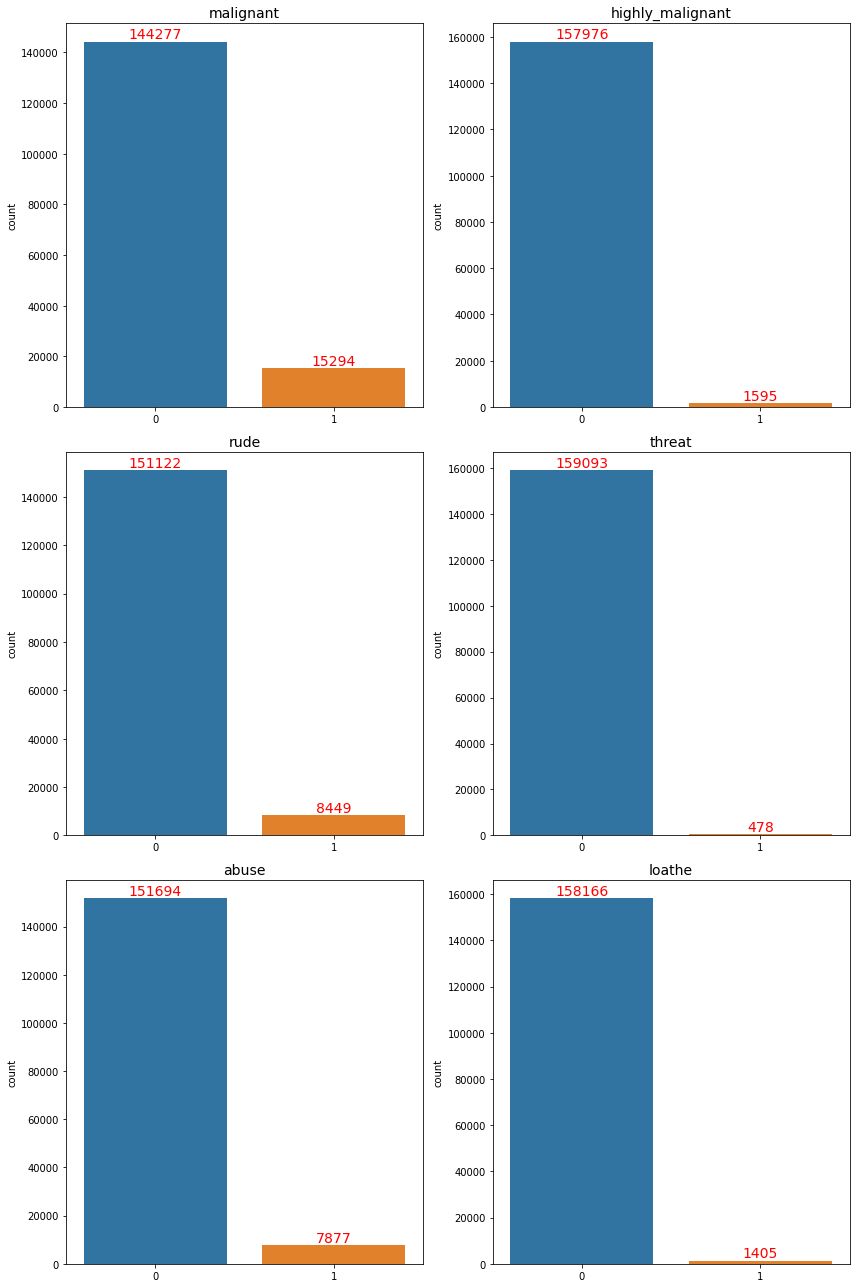

In [25]:
plt.figure(figsize=(12,18))
j=1
for i in ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

In [26]:
df_0 = df_train[(df_train['malignant']==0) & (df_train['highly_malignant']==0) & (df_train['rude']==0) & (df_train['threat']==0) & (df_train['abuse']==0) & (df_train['loathe']==0)]
df_1 = df_train[~(df_train['malignant']==0) & (df_train['highly_malignant']==0) & (df_train['rude']==0) & (df_train['threat']==0) & (df_train['abuse']==0) & (df_train['loathe']==0)]

In [30]:
split_0 = int(len(df_0)/4)
split_1 = int(len(df_1)/4)
print(split_0, split_1)
# df_train_1 = df_train[~((df_train['malignant']==0) & (df_train['highly_malignant']==0) & (df_train['rude']==0) & (df_train['threat']==0) & (df_train['abuse']==0) & (df_train['loathe']==0) & (df_train['Length']<200))]
# df_train_1

35836 1416


In [ ]:
df_a = df_0.loc[split_0*i:split_0*i+1,:]
df_a = df_1.loc[split_1*i:split_1*i+1,:]

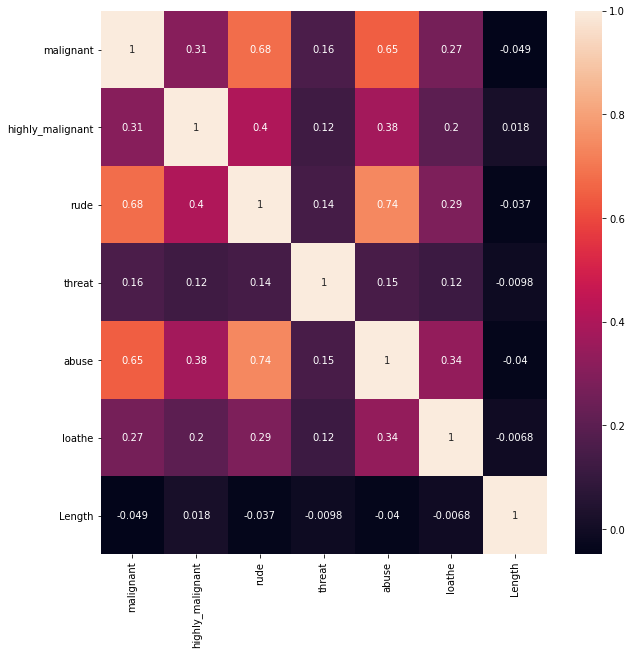

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe', 'Length']].corr(), annot=True)

### MODEL BUILDING

In [30]:
dfd = dd.from_pandas(df_train, npartitions=5)

In [31]:
dfd.tail()

id  ... Length
159566  ffe987279560d7ff  ...    188
159567  ffea4adeee384e90  ...     36
159568  ffee36eab5c267c9  ...     62
159569  fff125370e4aaaf3  ...     57
159570  fff46fc426af1f9a  ...    110

[5 rows x 9 columns]

In [32]:
from dask_ml.model_selection import train_test_split

# list_x = dfd["comment_text"].compute().tolist()
# list_y = dfd['malignant'].compute().tolist()
# Independent Variable
x = dfd['comment_text']
# Dependent Variable
y = dfd[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
x_train, x_test, y_train, y_test = train_test_split(list_x, list_y, test_size=0.20, random_state=42)

NameError: ignored

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000) # Initializing the Tfidf vectorizer with maximum of 23000 features and with ngram range of (1,3)
tfidf_vect_ngram.fit(x)
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [43]:
from dask_ml.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=2**15)
x_train = hash_vectorizer.fit_transform(x_train)
x_test = hash_vectorizer.transform(x_test)

#### BINARY RELEVANCE

In [44]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.2MB/s 


In [1]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from dask_ml.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix, lil_matrix

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

NameError: ignored

In [53]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

accuracy_score(y_test,predictions)

AttributeError: ignored

In [54]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

accuracy_score(y_test,predictions)

AttributeError: ignored

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=10)
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

In [ ]:
# # Checking for the best model based on accuracy score
# from skmultilearn.problem_transform import BinaryRelevance
# max_scr = 0

# for i,j in models.items():
#     classifier = BinaryRelevance(j['model'])
#     best_model_scr = 0
    
#     classifier.fit(x_train,y_train)
#     pred_test = classifier.predict(x_test)
#     acc = accuracy_score(y_test,pred_test)
#     if acc > best_model_scr:
#         best_model_scr = acc
#     print("Model : ",j['model'])
#     print("Score : ",best_model_scr)
#     print('-------------------------------------------------------------------------------------------')
#     if best_model_scr>max_scr:
#         max_scr = best_model_scr
#         best_model = j['model']
# print("-------------------------------------------------------------------------------------------")    
# print("Best Model : ",best_model)
# print("Best Score : ",max_scr)